In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
from tqdm.notebook import tqdm # type: ignore
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Model, load_model # type: ignore
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # type: ignore
from data_processing_script import *
from dataset_utils import *
from model_utils import *
from plot_functions import *

In [ ]:
pts = np.load('pts_in_hull.npy')
ab_domain = get_ab_domain()

In [ ]:
pts[:10, :], ab_domain[:10, :]

In [ ]:
train_ds, val_paths = create_dataset('images', batch_size=2, validation_split=0, get_probs=True)

In [ ]:
for batch in train_ds.take(1):
    x_train, y_train = batch

In [ ]:
p = get_p(y_train)

In [ ]:
def plot_l_and_ab_channels(img_l, img_ab, l_value=50):
     # Create an empty LAB image with L channel set to l_value
     h, w = img_l.shape
     img_lab = np.zeros((h, w, 3))
     img_lab[:, :, 0] = img_l  # Set L channel to the given L channel
     img_lab[:, :, 1:] = img_ab  # Set AB channels

     # Convert LAB image to RGB
     img_rgb = color.lab2rgb(img_lab)

     # Plot the images side by side
     fig, ax = plt.subplots(1, 2, figsize=(12, 6))

     # Plot the black and white (L channel) image
     ax[0].imshow(img_l, cmap='gray')
     ax[0].axis('off')
     ax[0].set_title('L Channel (Black & White)')

     # Plot the color image
     ax[1].imshow(img_rgb)
     ax[1].axis('off')
     ax[1].set_title('Color Image')

     plt.show()



In [ ]:
for batch in train_ds.take(1):
    img_l_batch, img_ab_batch = batch
    img_l_example = img_l_batch[2].numpy().squeeze()
    img_ab_example = img_ab_batch[2].numpy()
    plot_l_and_ab_channels(img_l_example, img_ab_example)

In [ ]:
model = ModelGenerator()
# loss = multinomial_crossentropy_loss

model.compile(
    optimizer='adam',
    loss=multinomial_crossentropy_loss,
    metrics=[
        'accuracy', mse, mae, psnr]
)

early_stopping_callback = EarlyStopping(
    monitor='loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)
checkpoint_callback = ModelCheckpoint(
    filepath='model-{epoch:02d}-{loss:.2f}.h5',  # Save with epoch number in filename
    monitor='loss', 
    save_best_only=False,       # Save every epoch, not just the best
    save_weights_only=False, 
    mode='min',                      
    verbose=1                         
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=1,
    callbacks=[early_stopping_callback, checkpoint_callback]
)

In [2]:
model = load_model("model-best.keras", custom_objects={'multinomial_crossentropy_loss': multinomial_crossentropy_loss, 'mse': mse, 'mae': mae, 'psnr': psnr})

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2024-07-19 09:00:05.452456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-19 09:00:05.453311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [211]:
paths = ['images/2804_page_56.jpg', 'images/8986_page_28.jpg', 'images/14196_page_25.jpg', 'images/14884_page_22.jpg', 'images/12643_page_39.jpg', 'images/11863_page_31.jpg', 'images/6177_page_80.jpg', 'images/6807_page_87.jpg', 'images/3558_page_55.jpg', 'images/14662_page_30.jpg', 'images/9712_page_35.jpg', 'images/6914_page_89.jpg', 'images/9265_page_31.jpg', 'images/4474_page_62.jpg', 'images/2485_page_53.jpg', 'images/14856_page_2.jpg', 'images/3358_page_3.jpg', 'images/11356_page_26.jpg', 'images/3517_page_55.jpg', 'images/5015_page_67.jpg', 'images/13882_page_22.jpg', 'images/3559_page_55.jpg', 'images/15419_page_5.jpg', 'images/2539_page_53.jpg', 'images/8728_page_25.jpg', 'images/9264_page_31.jpg', 'images/9331_page_31.jpg', 'images/13131_page_44.jpg', 'images/6039_page_79.jpg', 'images/5660_page_75.jpg', 'images/11586_page_29.jpg', 'images/11888_page_32.jpg', 'images/7023_page_90.jpg', 'images/14778_page_21.jpg', 'images/12787_page_41.jpg', 'images/12872_page_42.jpg', 'images/12948_page_42.jpg', 'images/4051_page_61.jpg', 'images/10765_page_46.jpg', 'images/10582_page_44.jpg', 'images/14371_page_27.jpg', 'images/6043_page_79.jpg', 'images/7776_page_98.jpg', 'images/8145_page_102.jpg', 'images/3527_page_55.jpg', 'images/1977_page_47.jpg']
print(len(paths))
good_samples = [5, 11, 17, 19, 27, (28), 39, (43)]
# path = 'images/4636_page_63.jpg'
path = paths[11]
# path = val_paths[0]
original_img = np.asarray(Image.open(path))
_, l_orig, ab_orig = preprocess_img(original_img, get_probs=False)
l_orig, ab_orig = l_orig[0], ab_orig[0]
l_orig_tens = tf.convert_to_tensor(l_orig, dtype=tf.float32)

ab_domain = get_ab_domain()

Z_output_tens = model.predict(tf.expand_dims(l_orig_tens, axis=0))

Z_output, lab_output, rgb_output = postprocess_output(l_orig, Z_output_tens, ab_domain)


46
1/1 [==============================] - 0s 291ms/step


/Users/lakshya/Programming/AI/Manga Colouring/dataset_utils.py:142: RuntimeWarning: divide by zero encountered in log
  Z = np.exp(np.log(Z) / T)


Z_output shape:  (1, 256, 256, 274)
Z_output shape changed:  (256, 256, 274)


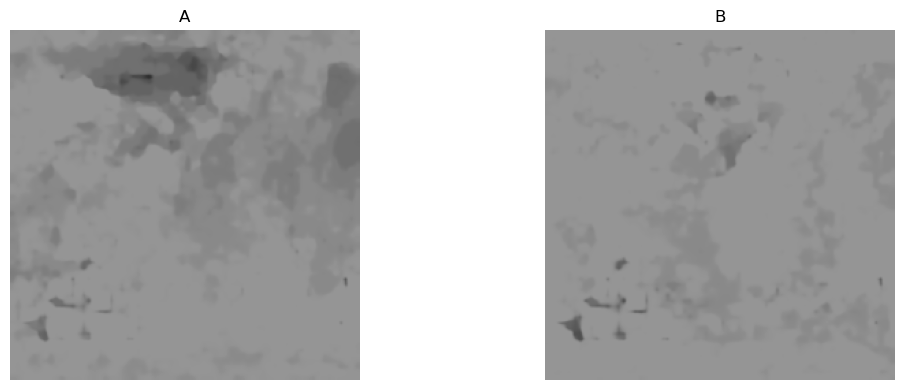

In [212]:
plot_ab_channels(lab_output[:, :, 1], lab_output[:, :, 2])

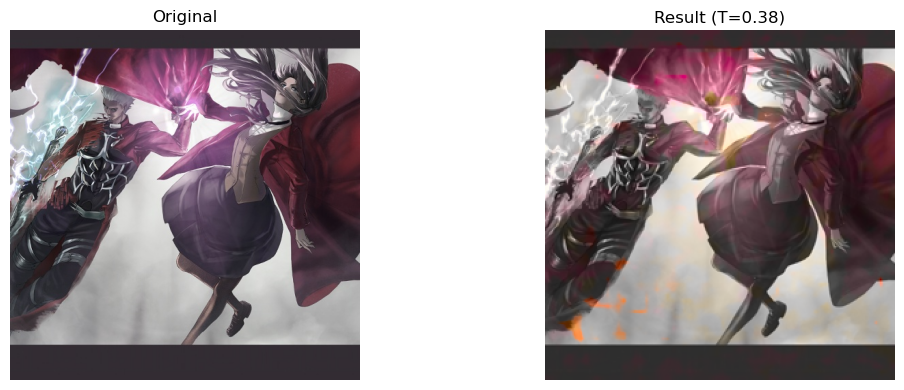

In [213]:
plot_images(original_img, rgb_output)

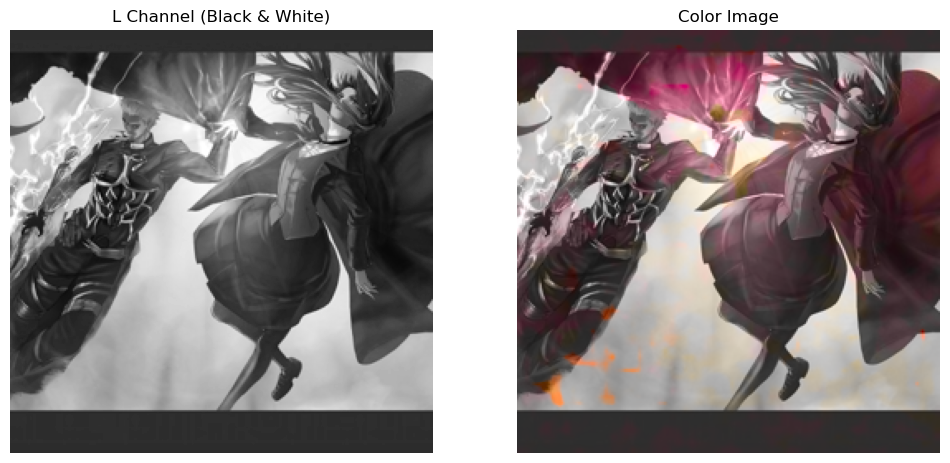

In [214]:
plot_l_and_ab_channels(lab_output[:, :, 0], lab_output[:, :, 1:])

In [ ]:
ab_domain = get_ab_domain() 
Z = ab_to_z(ab_orig, 1015)
Z = np.expand_dims(Z, axis=0)
Z = tf.convert_to_tensor(Z, dtype=tf.float32)
Z.shape

In [ ]:
Z_out, lab_out, rgb_out = postprocess_output(l_orig, Z, ab_domain)

In [ ]:
plot_images(original_img, rgb_out, T=0.5)

In [ ]:
dummy_Z_output_tens = np.random.uniform(size=(1, 256, 256, 274))
dummy_Z_output_tens = tf.convert_to_tensor(dummy_Z_output_tens, dtype=tf.float32)
dummy_Z_output, dummy_lab_output, dummy_rgb_output = postprocess_output(l_orig, dummy_Z_output_tens, ab_domain)

In [60]:
plot_ab_channels(dummy_lab_output[:, :, 1], dummy_lab_output[:, :, 2])

NameError: name 'dummy_lab_output' is not defined

In [ ]:
for T in [0.1, 0.5, 0.9]:
    plot_images(original_img, dummy_rgb_output, T=T)